# Objective #

This project analyzes the IBM HR Analytics dataset to better understand the key drivers of employee attrition. Using Exploratory Data Analysis (EDA), we examine trends across departments, job roles, and demographic groups to identify patterns that may signal higher turnover risk. By leveraging data visualization and statistical summaries, the analysis highlights areas where HR managers can focus retention efforts and strengthen workforce planning. The purpose of this study is not to build predictive models, but to generate actionable insights that support data-driven decision-making in employee engagement and retention strategies.

In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as ny

import warnings 
warnings.filterwarnings('ignore')

df = pd.read_csv('/kaggle/input/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()

# special color palette

colors = ['#f8f4d9', '#c4b55a', '#8f7f2a', '#6b5500']

# Employee Attrition Analysis with IBM HR Dataset #

**Age**: The age of the employee.

**Attrition**: Whether the employee has left the company. Takes values "Yes" or "No".

**BusinessTravel**: Frequency of business travel for the employee.

**DailyRate**: The employee’s daily wage.

**Department**: The department where the employee works.

**DistanceFromHome**: Distance between the employee’s home and workplace.

**Education**: Education level of the employee (e.g., 1: High School, 2: 
Associate Degree, etc.).

**EducationField**: The field of study of the employee.

**EmployeeCount**: A column where each employee is counted as 1. Typically 
used for dataset validation.

**EmployeeNumber**: A unique identifier for each employee.

**RelationshipSatisfaction**: Satisfaction with relationships at work. Expressed as a numeric value.

**StandardHours**: Standard working hours for the employee. Usually a constant value for all employees.

**StockOptionLevel**: The stock option level of the employee.

**JobSatisfaction**: Job satisfaction level of the employee. Expressed as a numeric value.

**TotalWorkingYears**: Total years of professional experience of the employee.

**TrainingTimesLastYear**: Number of training sessions the employee attended in the last year.

**WorkLifeBalance**: Satisfaction with work-life balance. Expressed as a numeric value.

**YearsAtCompany**: Number of years the employee has worked at the current company.

**YearsInCurrentRole**: Number of years the employee has been in their current role.

**YearsSinceLastPromotion**: Number of years since the employee’s last promotion.

**YearsWithCurrManager**: Number of years the employee has worked with their current manager.

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

This dataset does not contain any missing values.

In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


In [4]:
# missing value analysis

df.isna().sum()
df.isna().mean() * 100

Age                         0.0
Attrition                   0.0
BusinessTravel              0.0
DailyRate                   0.0
Department                  0.0
DistanceFromHome            0.0
Education                   0.0
EducationField              0.0
EmployeeCount               0.0
EmployeeNumber              0.0
EnvironmentSatisfaction     0.0
Gender                      0.0
HourlyRate                  0.0
JobInvolvement              0.0
JobLevel                    0.0
JobRole                     0.0
JobSatisfaction             0.0
MaritalStatus               0.0
MonthlyIncome               0.0
MonthlyRate                 0.0
NumCompaniesWorked          0.0
Over18                      0.0
OverTime                    0.0
PercentSalaryHike           0.0
PerformanceRating           0.0
RelationshipSatisfaction    0.0
StandardHours               0.0
StockOptionLevel            0.0
TotalWorkingYears           0.0
TrainingTimesLastYear       0.0
WorkLifeBalance             0.0
YearsAtC

In [5]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

# 1) Attrition Distribution #

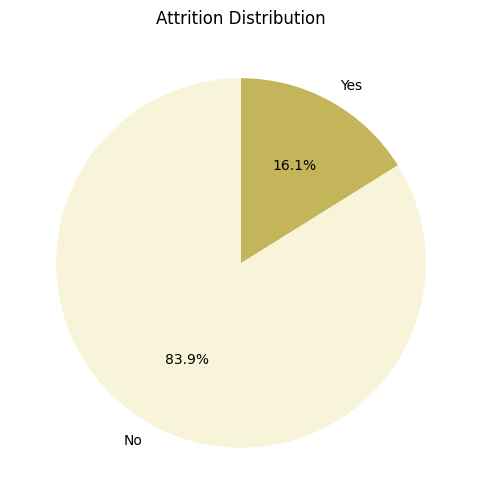

In [6]:
plt.figure(figsize=(6,6))
df['Attrition'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=colors[:2])
plt.title('Attrition Distribution')
plt.ylabel('')
plt.show()

The provided chart clearly illustrates a robust level of employee retention within the company. A substantial majority, exceeding 80% of employees, choose to remain with the organization.

# 2) Age Distribution #

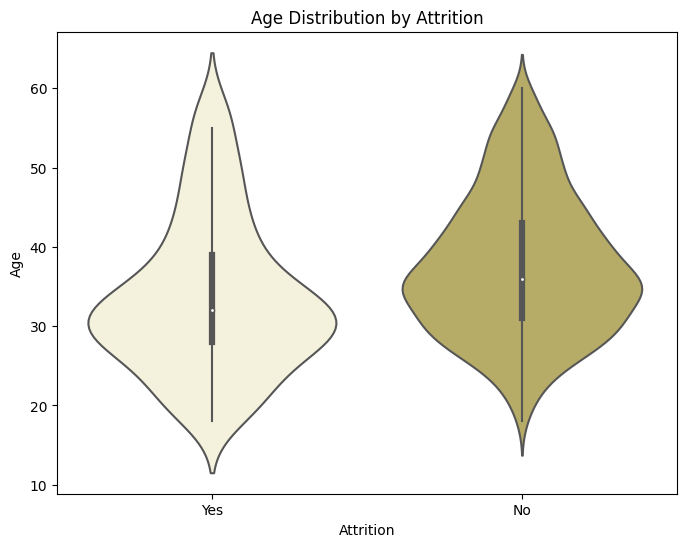

In [7]:
plt.figure(figsize=(8,6))
sns.violinplot(x="Attrition", y="Age", data=df, palette=colors[:2])
plt.title('Age Distribution by Attrition')
plt.show()

Analysis of the age distribution among employees reveals a prominent concentration in the mid-30s, with a distinct peak around 35 years of age. 

# 3) Gender and Attrition #

<Figure size 700x500 with 0 Axes>

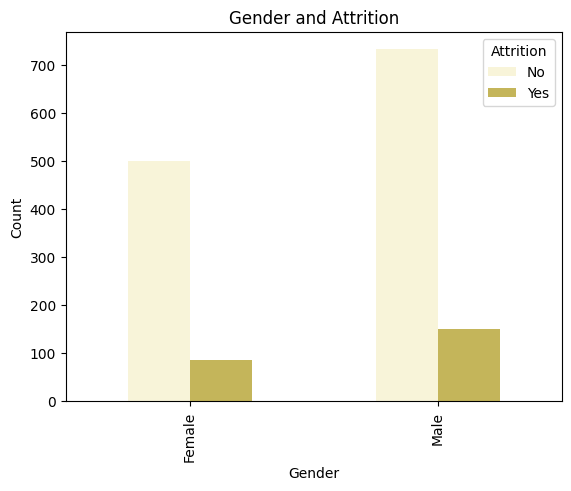

In [8]:
plt.figure(figsize=(7,5))
df.groupby(['Gender','Attrition']).size().unstack().plot(kind='bar', color=colors[:2])
plt.title('Gender and Attrition')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

The analysis indicates a marginally higher attrition rate among male employees compared to their female counterparts.

# 4) Department Based Salary and Leave #

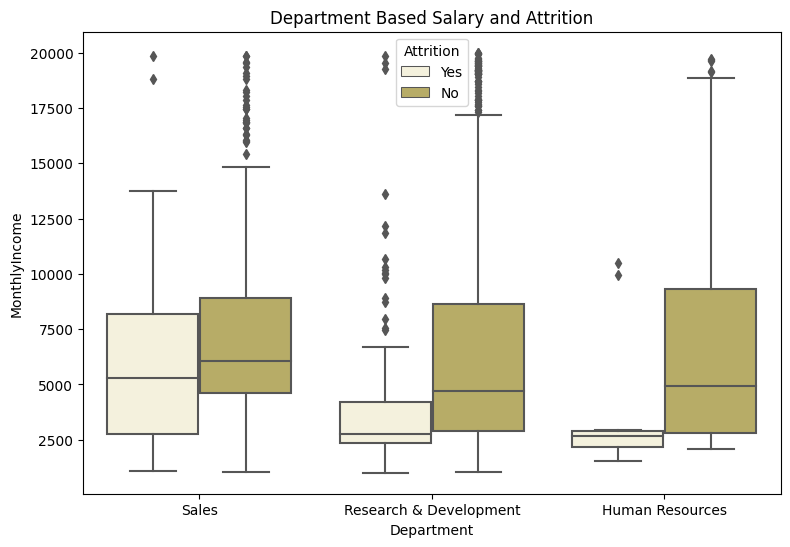

In [9]:
plt.figure(figsize=(9,6))
sns.boxplot(x="Department", y="MonthlyIncome", hue="Attrition", data=df, palette=colors[:2])
plt.title('Department Based Salary and Attrition')
plt.show()

The data clearly illustrates that the Sales department commands the highest average salaries within the company, whereas the HR department exhibits the lowest compensation levels.

# 5) Number and Attrition by JobRole #

<Figure size 1000x600 with 0 Axes>

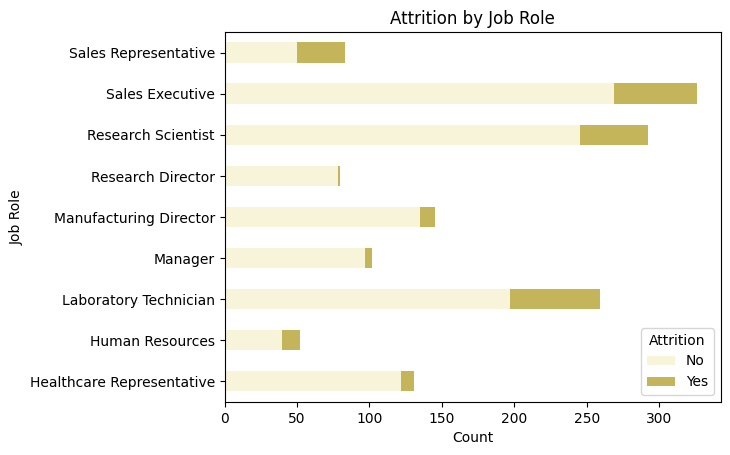

In [10]:
plt.figure(figsize=(10,6))
df.groupby(['JobRole', 'Attrition']).size().unstack().plot(kind='barh',stacked=True, color=colors[:2])
plt.title('Attrition by Job Role')
plt.xlabel('Count')
plt.ylabel('Job Role')
plt.show()

Across all job roles, the number of employees who opted for attrition is significantly lower when compared to those who chose to remain with the company. This consistently demonstrates a strong overall retention rate across the organization's various functions.

# 6) OverTime and Attrition #

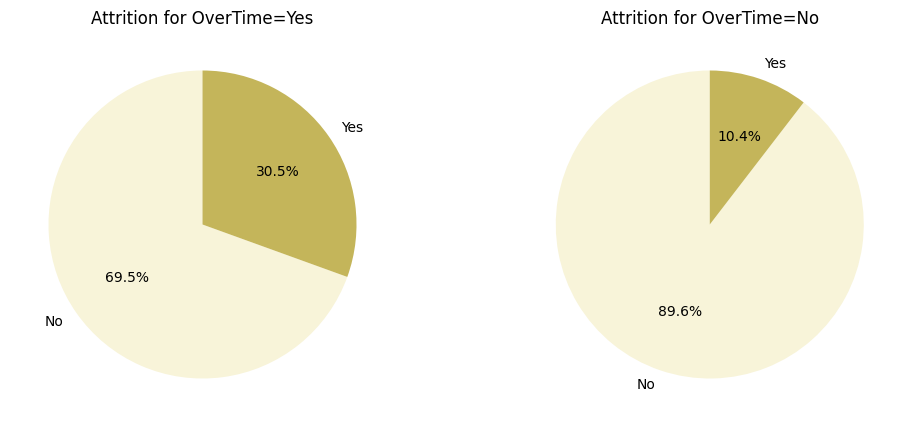

In [11]:
plt.figure(figsize=(12,5))
for i, status in enumerate(df['OverTime'].unique()):
    plt.subplot(1,2,i+1)
    df[df['OverTime']==status]['Attrition'].value_counts().plot.pie(
        autopct='%1.1f%%',startangle=90, colors=colors[:2])
    plt.title(f'Attrition for OverTime={status}')
    plt.ylabel('')
plt.show()

A significant observation is that employees who regularly work overtime exhibit a higher attrition rate compared to those who do not.

# 7) Seniority

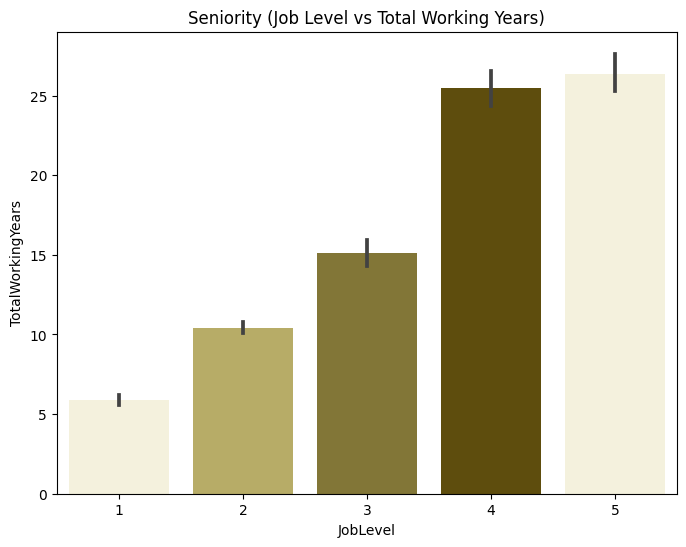

In [12]:
plt.figure(figsize=(8,6))
sns.barplot(x="JobLevel", y="TotalWorkingYears", data=df, palette=colors)
plt.title('Seniority (Job Level vs Total Working Years)')
plt.show()

The attrition rate for those who have started working recently may be high.

# 8) Promotion Period and Attrition #

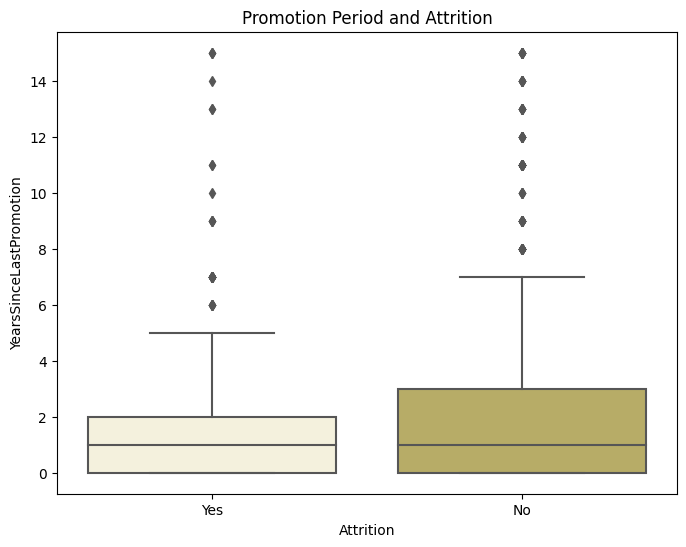

In [13]:
plt.figure(figsize=(8,6))
sns.boxplot(x="Attrition", y="YearsSinceLastPromotion", data=df, palette=colors[:2])
plt.title('Promotion Period and Attrition')
plt.show()

A notable trend emerges: the majority of employees who attrited did so within the initial two years following their last promotion. 

# 9) Relationship Between Education and Salary

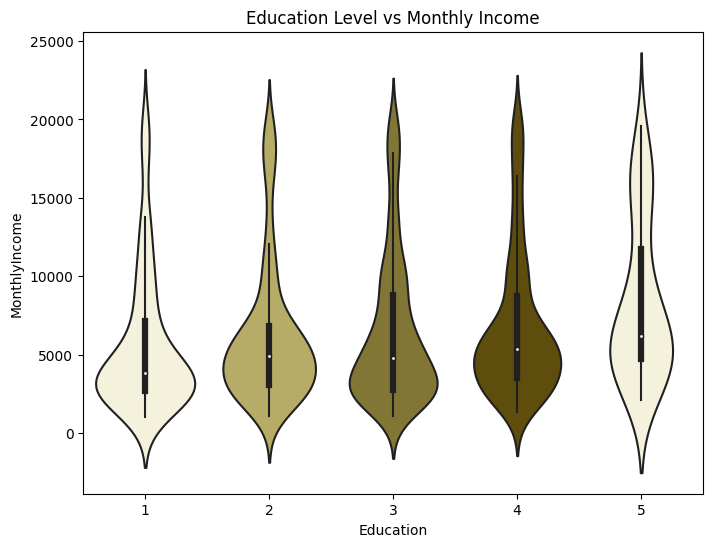

In [14]:
plt.figure(figsize=(8,6))
sns.violinplot(x="Education", y="MonthlyIncome", data=df, palette=colors)
plt.title('Education Level vs Monthly Income')
plt.show()

There is a clear positive correlation between an employee's level of education and their corresponding salary, indicating that higher educational attainment is associated with increased compensation.

# 10) Compare Employee Well-being with Turnover

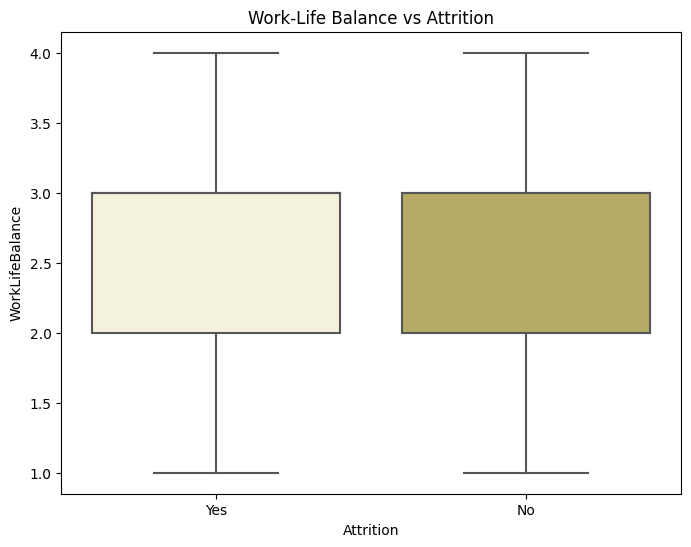

In [15]:
plt.figure(figsize=(8,6))
sns.boxplot(x="Attrition", y="WorkLifeBalance", data=df, palette=colors[:2])
plt.title('Work-Life Balance vs Attrition')
plt.show()

Analysis reveals a strong correlation between work environment satisfaction and employee attrition. A significant majority of employees who depart the company report a 'Low' level of satisfaction with their work environment.

# 11) Correlation Heatmap

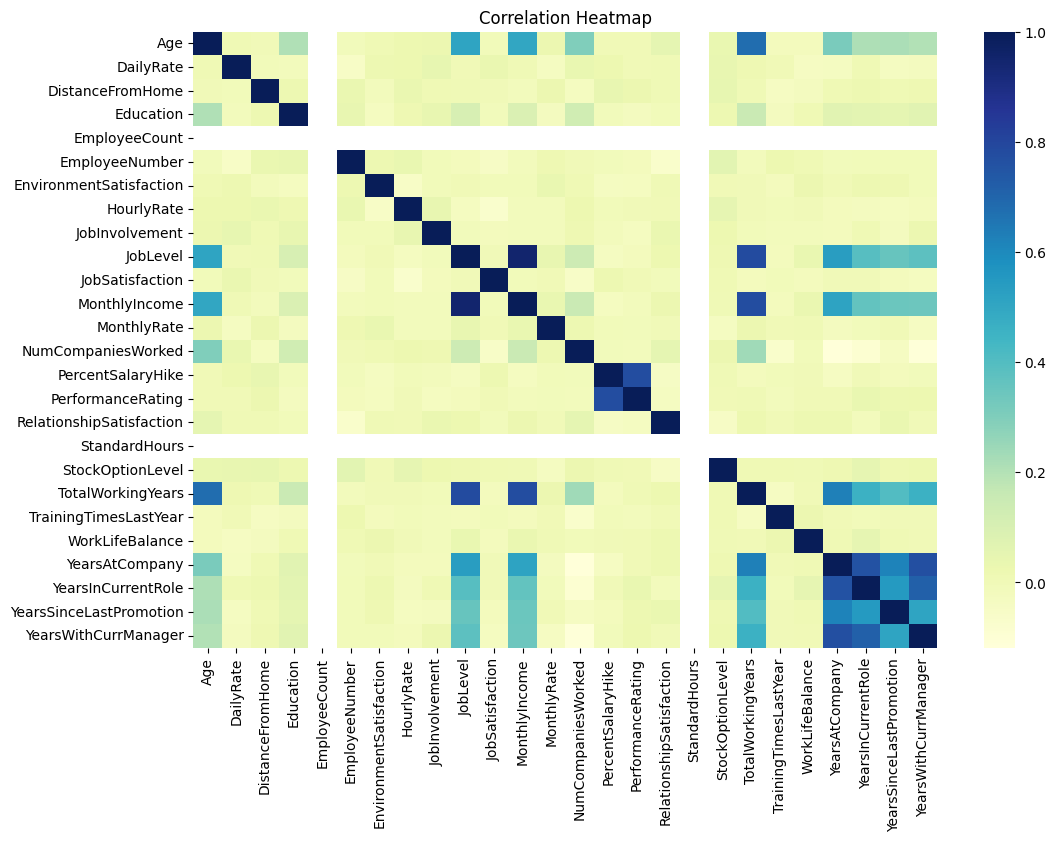

In [16]:
plt.figure(figsize=(12,8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=False, cmap="YlGnBu")
plt.title('Correlation Heatmap')
plt.show()

"The correlation heatmap provides a comprehensive overview of the linear relationships between various numerical features in the dataset.

## 1. Strong Positive Correlations: ##

   **Age, TotalWorkingYears, YearsAtCompany, YearsSinceLastPromotion, YearsWithCurrManager:** These variables show strong positive inter-correlations, forming a distinct darker blue block. This is intuitive, as older employees generally have more total working years, and often more years at the current company, leading to more promotions and longer tenure with their current manager.

   **MonthlyIncome and JobLevel:** There's a strong positive correlation between MonthlyIncome and JobLevel. This indicates that as an employee's job level increases, their monthly income tends to rise significantly.

   **JobLevel, TotalWorkingYears, YearsAtCompany:** JobLevel also shows strong positive correlations with TotalWorkingYears and YearsAtCompany, suggesting that higher job levels are typically achieved with more experience and tenure.

## 2. Moderate Correlations: ##

   **NumCompaniesWorked and TotalWorkingYears:** A moderate negative correlation might be present (though not extremely dark), implying that employees with more total working years might have worked at fewer companies, or vice versa, depending on career trajectories.
   
   **PerformanceRating and MonthlyIncome:** While not extremely strong, there might be a slight positive correlation, indicating that higher performance could be associated with higher income.  

## 3. Weak or Negligible Correlations: ##

   **DailyRate, HourlyRate, MonthlyRate:** These rate-based variables show very weak correlations with most other variables, appearing as lighter squares. This suggests that the daily, hourly, or monthly payment rates themselves are largely independent of factors like age, total working years, or job level.
   
   **DistanceFromHome:** Generally, DistanceFromHome exhibits weak correlations with most other features, indicating that how far an employee lives from work does not strongly influence other factors like income, age, or job satisfaction.

   **Gender, Education, EducationField:** These categorical (or ordinal) variables, while present, often show weaker linear correlations with purely numerical continuous variables, as expected.

**Inference:**

The heatmap highlights critical interdependencies, particularly around age, experience, and career progression directly influencing income and job level. Features like daily/hourly rates and distance from home appear to be more independent. This analysis is valuable for understanding the underlying structure of the data and for guiding further modeling efforts, such as identifying potential multicollinearity or selecting relevant features for predicting outcomes like attrition."

# Summary #

The visual analyses offer meaningful insights into the company’s workforce profile and attrition patterns. While overall engagement levels appear strong and the attrition rate remains relatively low, the results highlight several factors that significantly influence employee retention and satisfaction. These findings provide a data-driven foundation for HR managers to better understand workforce dynamics and identify areas that may benefit from targeted interventions.